In [1]:
%pylab inline
import seaborn as sns
sns.set_context('talk', font_scale=1.6)
sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


In [2]:
N_noisy = 1600
N_sine = 200
N_exponential = 200

# Simulate Data

In [3]:
# Time in minutes
np.random.seed(42)
T = np.linspace(0, 130, 10)
X = None
for t in T:
    # Noisy genes from random
    X_noisy_genes = np.random.normal(loc=0, scale=0.5, size=N_noisy)
    
    
    # Sine pattern genes
    a = np.random.uniform(low=1.5, high=3, size=N_sine)
    X_sine_genes = a * np.sin(2*np.pi*t/140)
    
    # Exponential pattern genes
    b = np.random.uniform(low=4, high=8, size=N_exponential)
    X_expon_genes = b * np.exp(-t/100)
    Xt = np.hstack([X_noisy_genes, X_sine_genes, X_expon_genes])
    Xt = Xt.reshape(N_noisy+N_sine+N_exponential, 1)
    if X is None:
        X = Xt
    else:
        X = np.hstack([X, Xt])

    
    
    



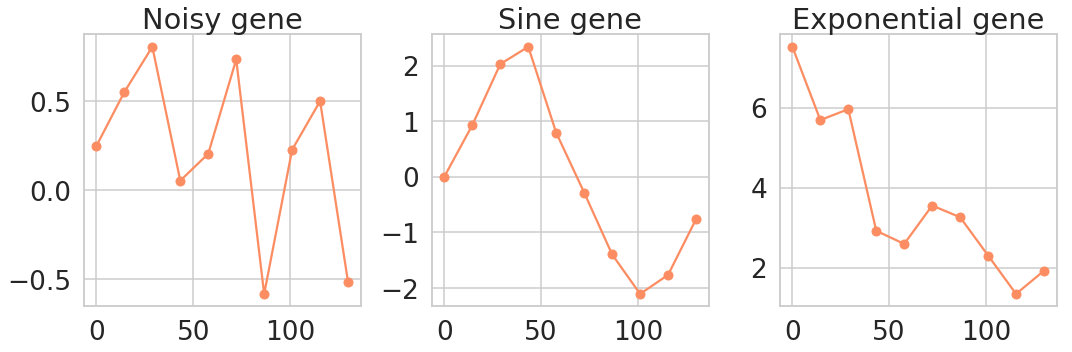

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
params = {'marker': 'o', 'color':sns.color_palette('Set2')[1]}
ax = axes[0]
ax.plot(T, X[0, :], **params)
ax.set_title('Noisy gene')

ax = axes[1]
ax.plot(T, X[N_noisy+10, :],  **params)
ax.set_title('Sine gene')


ax = axes[2]
ax.plot(T, X[-1, :], **params)
ax.set_title('Exponential gene')

fig.tight_layout()


# Perform SVD

In [5]:
U, S, V_T = np.linalg.svd(X, full_matrices=False)
# Note: The v returned by this function is V.T

# Relative Variance Distribution

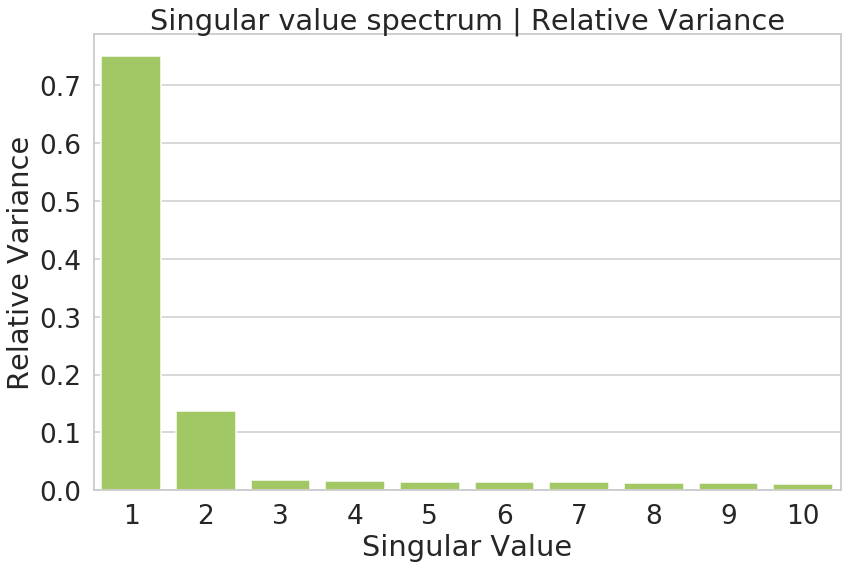

In [6]:
variances_S = S**2/np.sum(S**2)
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=np.arange(1, len(variances_S)+1), y=variances_S, ax=ax, color=sns.color_palette('Set2')[4])
ax.set_xlabel('Singular Value')
ax.set_ylabel('Relative Variance')
ax.set_title('Singular value spectrum | Relative Variance (no-centering)')
fig.tight_layout()

# Rank 2 approximation

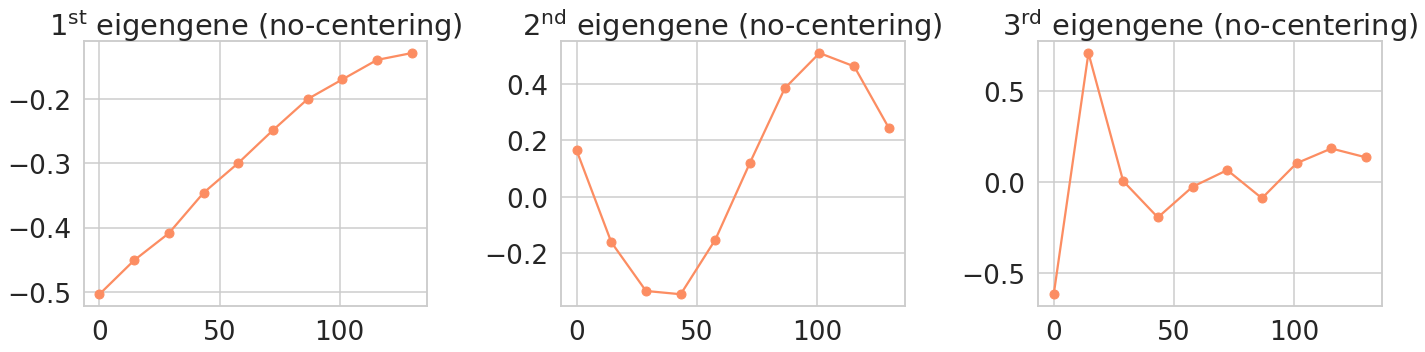

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
params = {'marker': 'o', 'color':sns.color_palette('Set2')[1]}
ax = axes[0]
ax.plot(T, V_T[0, :], **params)
ax.set_title('$1^{\mathrm{st}}$ eigengene (no-centering)')

ax = axes[1]
ax.plot(T, V_T[1, :],  **params)
ax.set_title('$2^{\mathrm{nd}}$ eigengene (no-centering)')


ax = axes[2]
ax.plot(T, V_T[2, :], **params)
ax.set_title('$3^{\mathrm{rd}}$ eigengene (no-centering)')
fig.tight_layout()

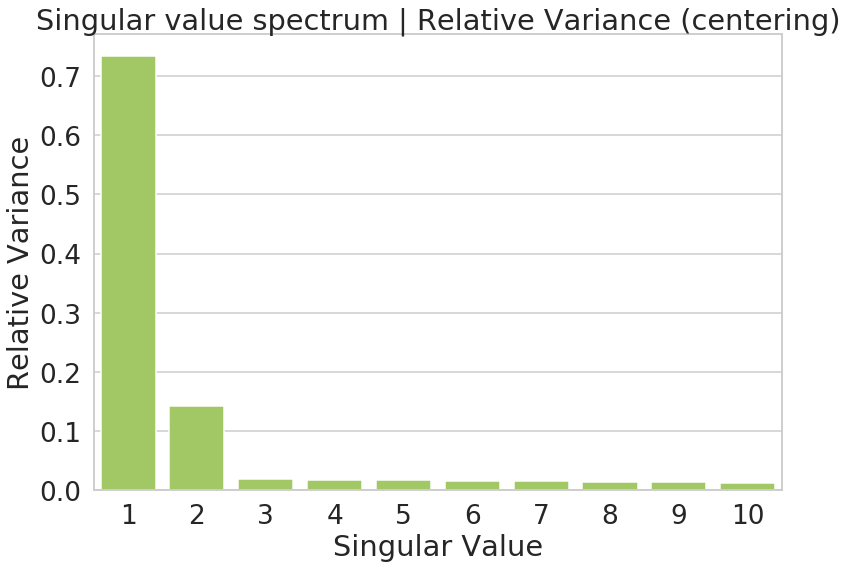

In [11]:
U_centering, S_centering, V_T_centering = np.linalg.svd(X - X.mean(axis=0, keepdims=True), full_matrices=False)
variances_S_centering = S_centering**2/np.sum(S_centering**2)
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=np.arange(1, len(variances_S_centering)+1), y=variances_S_centering, ax=ax, color=sns.color_palette('Set2')[4])
ax.set_xlabel('Singular Value')
ax.set_ylabel('Relative Variance')
ax.set_title('Singular value spectrum | Relative Variance (post-centering columns)')
fig.tight_layout()

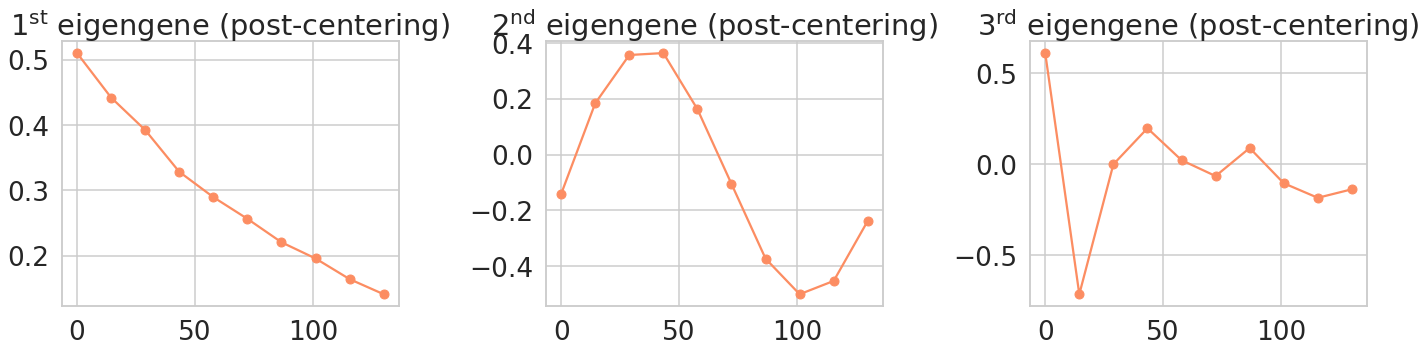

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
params = {'marker': 'o', 'color':sns.color_palette('Set2')[1]}
ax = axes[0]
ax.plot(T, V_T_centering[0, :], **params)
ax.set_title('$1^{\mathrm{st}}$ eigengene (post-centering columns)')

ax = axes[1]
ax.plot(T, V_T_centering[1, :],  **params)
ax.set_title('$2^{\mathrm{nd}}$ eigengene (post-centering columns)')


ax = axes[2]
ax.plot(T, V_T_centering[2, :], **params)
ax.set_title('$3^{\mathrm{rd}}$ eigengene (post-centering columns)')
fig.tight_layout()

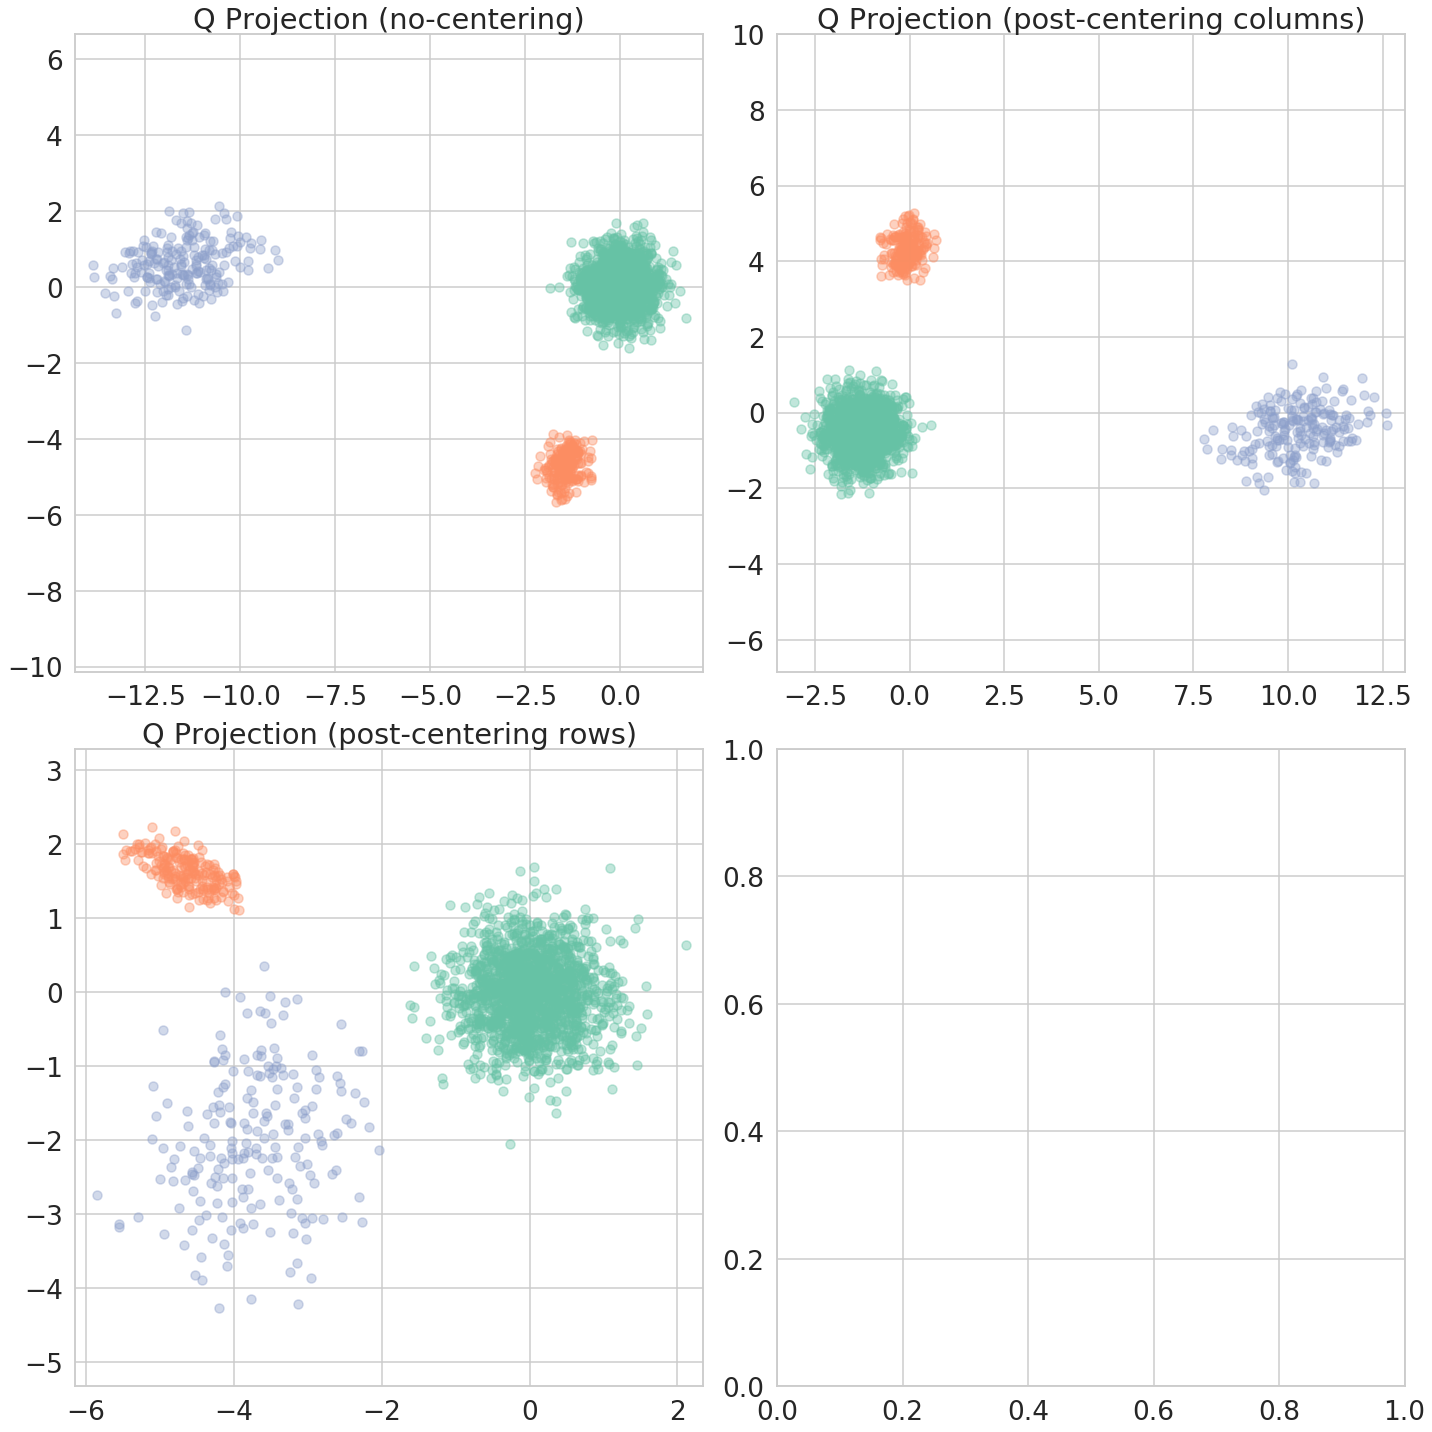

In [16]:
U, S, V_T = np.linalg.svd(X, full_matrices=False)

Q = np.dot(U, np.diag(S))


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
ax =  axes[0, 0]
ax.scatter(Q[:N_noisy,0], Q[:N_noisy, 1], alpha=0.4, color=sns.color_palette('Set2')[0], label='Noisy')
ax.scatter(Q[N_noisy:N_noisy+N_sine, 0], Q[N_noisy:N_noisy+N_sine, 1], alpha=0.4, color=sns.color_palette('Set2')[1], label='sine')
ax.scatter(Q[N_noisy+N_sine:,0], Q[N_noisy+N_sine:, 1], alpha=0.4, color=sns.color_palette('Set2')[2], label='exponential')
#ax.legend()
ax.axis('equal')
ax.set_title('Q Projection (no-centering)')

U_centering, S_centering, V_T_centering = np.linalg.svd(X - X.mean(axis=0, keepdims=True), full_matrices=False)    
Q_centering = np.dot(U_centering, np.diag(S_centering))
ax =  axes[0, 1]
ax.scatter(Q_centering[:N_noisy,0], Q_centering[:N_noisy, 1], alpha=0.4, color=sns.color_palette('Set2')[0], label='Noisy')
ax.scatter(Q_centering[N_noisy:N_noisy+N_sine, 0], Q_centering[N_noisy:N_noisy+N_sine, 1], alpha=0.4, color=sns.color_palette('Set2')[1], label='sine')
ax.scatter(Q_centering[N_noisy+N_sine:,0], Q_centering[N_noisy+N_sine:, 1], alpha=0.4, color=sns.color_palette('Set2')[2], label='exponential')
ax.set_title('Q Projection (post-centering columns)')
#ax.legend()
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.axis('equal')

U_centering, S_centering, V_T_centering = np.linalg.svd(X - X.mean(axis=1, keepdims=True), full_matrices=False)    
Q_centering = np.dot(U_centering, np.diag(S_centering))
ax =  axes[1, 0]
ax.scatter(Q_centering[:N_noisy,0], Q_centering[:N_noisy, 1], alpha=0.4, color=sns.color_palette('Set2')[0], label='Noisy')
ax.scatter(Q_centering[N_noisy:N_noisy+N_sine, 0], Q_centering[N_noisy:N_noisy+N_sine, 1], alpha=0.4, color=sns.color_palette('Set2')[1], label='sine')
ax.scatter(Q_centering[N_noisy+N_sine:,0], Q_centering[N_noisy+N_sine:, 1], alpha=0.4, color=sns.color_palette('Set2')[2], label='exponential')
ax.set_title('Q Projection (post-centering rows)')
#ax.legend()
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.axis('equal')


fig.tight_layout()    

# Correlation

In [24]:
U, S, V_T = np.linalg.svd(X, full_matrices=False)

#Q = np.dot(U, np.diag(S))

delta_G = X- np.mean(X, axis=0, keepdims=True)
delta_V = V_T-np.mean(V_T, axis=1, keepdims=True)

correlation = np.dot(delta_G, delta_V)/np.linalg.norm(delta_G, ord=2, axis=1, keepdims=True)/np.linalg.norm(delta_V, ord=2, axis=0, keepdims=True)

In [25]:
correlation.shape

(2000, 10)

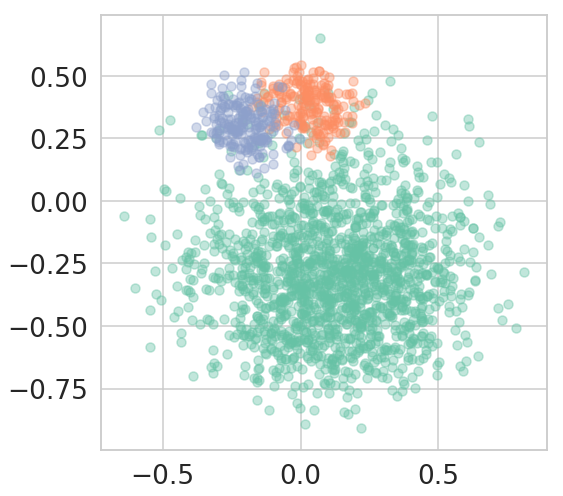

In [26]:
fig, ax =  plt.subplots(figsize=(8,8))
ax.scatter(correlation[:N_noisy,0], correlation[:N_noisy, 1], alpha=0.4, color=sns.color_palette('Set2')[0], label='Noisy')
ax.scatter(correlation[N_noisy:N_noisy+N_sine, 0], correlation[N_noisy:N_noisy+N_sine, 1], alpha=0.4, color=sns.color_palette('Set2')[1], label='sine')
ax.scatter(correlation[N_noisy+N_sine:,0], correlation[N_noisy+N_sine:, 1], alpha=0.4, color=sns.color_palette('Set2')[2], label='exponential')